In [1]:
import pandas as pd

df = pd.read_csv("vr_comments.csv")

# Selecting specific columns
selected_columns = ['Order', 'VR quality', 'Code name']
df = df[selected_columns]

df

,Order,VR quality,Code name
0,VRQ_3,Interactive technology,Utilitarian-Interaction
1,VRQ_1,it was very quick and reactive,Utilitarian-Interaction
2,VRQ_1,It was interactive,Utilitarian-Interaction
3,VRQ_2,very helpful to move around like this,Utilitarian-Interaction
4,VRQ_3,I had control over where to go,Utilitarian-Interaction
...,...,...,...
1212,VRQ_4,I really want to go and visit Dubai now,NaN
1213,VRQ_8,I would love to go,NaN
1214,VRQ_4,Wanting to visit the beach,NaN
1215,VRQ_2,Might create desire to visit places,NaN


In [2]:
df['Code name'] = df['Code name'].fillna("0")
df["VR quality"]

0                               Interactive technology
1                       it was very quick and reactive
2                                   It was interactive
3                very helpful to move around like this
4                       I had control over where to go
                             ...                      
1212           I really want to go and visit Dubai now
1213                                I would love to go
1214                        Wanting to visit the beach
1215               Might create desire to visit places
1216    I wish I had the money to go on a big vacation
Name: VR quality, Length: 1217, dtype: object

In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


In [4]:
df['VR quality'] = df['VR quality'].fillna("")

comments = ' '.join(df['VR quality'])
comments

'Interactive technology it was very quick and reactive It was interactive very helpful to move around like this I had control over where to go this is interactive. I like all the interactions that you can do by clicking just from your screen NICE AND INTERACTIVE The shots were mostly of interesting places It gave me actual movies of doing things. this is a decent selection of areas to explore The information on the sites was good The interface makes sense and is good at being low-profile. A great deal of ease, no problems doing what I wanted A lot of sceneries and options, I can visited most beautiful spots open for anyone I love the frame rate Lighting was nice, everything was bright and filled with colors It was relaxing Considering I could probably spend a few days, just on this virtual tour, then there\'s no shortage of things to actually see, when I\'m there. Opulent attractive It was well done The tour was excellent this is really neat generally well done high quality Fantastic! 

In [5]:
import re
pattern_to_remove = r"\b\w+'"

# Remove the pattern using regular expression substitution
all_comments = re.sub(pattern_to_remove, '', comments)

In [6]:
all_comments

'Interactive technology it was very quick and reactive It was interactive very helpful to move around like this I had control over where to go this is interactive. I like all the interactions that you can do by clicking just from your screen NICE AND INTERACTIVE The shots were mostly of interesting places It gave me actual movies of doing things. this is a decent selection of areas to explore The information on the sites was good The interface makes sense and is good at being low-profile. A great deal of ease, no problems doing what I wanted A lot of sceneries and options, I can visited most beautiful spots open for anyone I love the frame rate Lighting was nice, everything was bright and filled with colors It was relaxing Considering I could probably spend a few days, just on this virtual tour, then s no shortage of things to actually see, when m there. Opulent attractive It was well done The tour was excellent this is really neat generally well done high quality Fantastic! I love tec

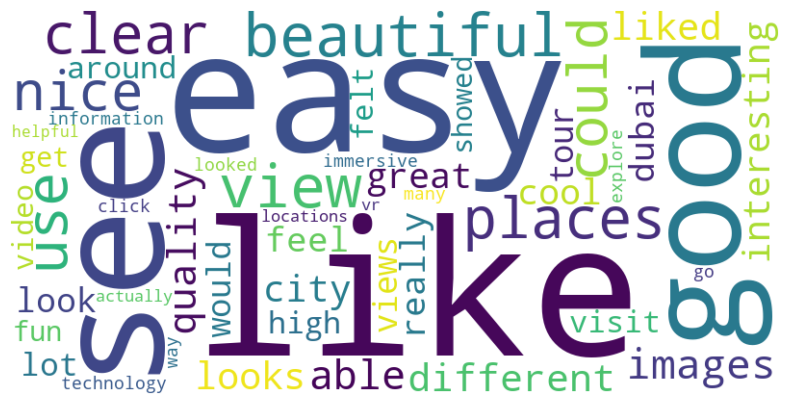

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import string


words = all_comments.split()

stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.lower() not in punctuations]

word_counts = Counter(filtered_words)

top_100_words = dict(word_counts.most_common(50))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
type(top_100_words) 

dict

In [9]:
# from sklearn.metrics.pairwise import cosine_similarity

# top_50_words = word_counts.most_common(50)

# for word, count in top_50_words:
#     all_words = word
#     similarity = cosine_similarity(all_words)
#     if similarity between words smaller than 50% get only those words and print it out showing the unique and difference in words

    

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

top_50_words = [word for word, count in word_counts.most_common(50)]


# Train Word2Vec model
word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)  
word2vec_model.build_vocab([top_50_words])  # Building the vocabulary
word2vec_model.train([top_50_words], total_examples=1, epochs=10)  # Dummy training as we're not training on actual sentences

# Extract word embeddings for the top 50 words
word_embeddings = np.array([word2vec_model.wv[word] for word in top_50_words if word in word2vec_model.wv])
word_embeddings.shape



(50, 100)

In [43]:
df

,Order,VR quality,Code name
0,VRQ_3,Interactive technology,Utilitarian-Interaction
1,VRQ_1,it was very quick and reactive,Utilitarian-Interaction
2,VRQ_1,It was interactive,Utilitarian-Interaction
3,VRQ_2,very helpful to move around like this,Utilitarian-Interaction
4,VRQ_3,I had control over where to go,Utilitarian-Interaction
...,...,...,...
1212,VRQ_4,I really want to go and visit Dubai now,0
1213,VRQ_8,I would love to go,0
1214,VRQ_4,Wanting to visit the beach,0
1215,VRQ_2,Might create desire to visit places,0


### Making unique dictionaries

In [35]:
import pandas as pd

df = pd.read_csv("clean_vr_comments.csv")

comments_dict = {}
for label in df["Code name"].unique():
    comments_for_label = df[df["Code name"] == label]["VR quality"].tolist()
    comments_dict[label] = comments_for_label

print("Choose a label from the following options:")
label_options = df["Code name"].unique()
for index, label in enumerate(label_options, start=1):
    print(f"{index}. {label}")

while True:
    choice = input("Enter the name of the label: ")
    if choice in label_options:
        break
    else:
        print("Invalid label. Please enter a valid label.")

selected_label = choice
if selected_label in comments_dict:
    selected_comments = comments_dict[selected_label]
    print(f"\nTotal comments found for label '{selected_label}': {len(selected_comments)}")
    print(f"\nComments for label '{selected_label}':")
    for comment in selected_comments:
        print(comment)
else:
    print("No comments found for the selected label.")


Choose a label from the following options:
1. Utilitarian-Interaction
2.  High-quality Content preparation
3. Overall user interface satisfaction 
4. Easy to use (overall)
5. Lots to do
6. Utilitarian-Others
7. frame rate
8. Lighting 
9. Relaxing experience
10. 0
11. Luxury experience
12. Attractiveness
13. General perceived quality
14. Cleaness and neatness
15. High quality (overall)
16. Up to date technology
17. Sofisticated design
18. Overall destination preview
19. Engaging experience
20. Excitement
21. Ability to click on destination labels
22. High-quality technology (overall)
23. Discuss latter
24. Comprehensive design
25. Variety of places
26. Informative
27. Overall Useful/helpful information
28. To increase the destiantion knowledge
29. To get location and layout information
30. To plan the travel
31. To know the destination activites
32. Inside-building view
33. Hotel plan
34. Desination architecture
35. Easy to use (Overall)
36. Helful tour guide
37. Efficient to learn
38. 

In [12]:
pip install TextBlob


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 1.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Applying Sentimental Analysis 

In [33]:
from textblob import TextBlob
from nltk.corpus import stopwords
import pandas as pd

stop_words = set(stopwords.words('english'))

# Apply sentiment analysis to all comments
df['Sentiment'] = df['VR quality'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiments into positive, neutral, and negative based on polarity
df['Sentiment Type'] = pd.cut(df['Sentiment'],
                                bins=[-1, -0.01, 0.01, 1],
                                labels=['Negative', 'Neutral', 'Positive'])

# Overview of sentiment distribution
sentiment_distribution = df['Sentiment Type'].value_counts(normalize=True) * 100

# Filter out stopwords before sentiment analysis
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

df['VR quality'] = df['VR quality'].apply(remove_stopwords)

negative_neutral_comments = df[df['Sentiment Type'].isin(['Negative', 'Neutral'])]['VR quality']

percentage_negative_neutral = (len(negative_neutral_comments) / len(df)) * 100

sentiment_distribution


Sentiment Type
Positive    64.579901
Neutral     32.537068
Negative     2.883031
Name: proportion, dtype: float64

In [31]:
positive_comments = df[df['Sentiment Type'] == 'Positive']['VR quality'].tolist()
negative_comments = df[df['Sentiment Type'] == 'Negative']['VR quality'].tolist()
neutral_comments = df[df['Sentiment Type'] == 'Neutral']['VR quality'].tolist()

# Create a dictionary
comments_dict = {
    'Positive': positive_comments,
    'Negative': negative_comments,
    'Neutral': neutral_comments
}

comments_dict["Negative"]


['Active experience rather passive information.',
 'used provide valuable medical services remote consultations.',
 'showed wide variety places',
 'could helpful showing people can’t afford long distance travel different places world',
 'Helps understand complex concepts, subjects, theories.',
 'predictable movement',
 'video scenes went slow.',
 'moved slowly',
 'moved slowly could view wanted',
 'Pan slow allow maximum enjoyment',
 'slow thorough pace',
 'wide variety shots',
 'thought images sharp clear',
 'fancy shopping center',
 'help boost mental health, used relaxation mindfulness.',
 'makes feel ease regarding anxiety visiting unknown places',
 'curious',
 'Gratitude chance least visit virtually',
 'Slow immersed',
 'thats 1 positive thought, first one clunk poorly done worse google maps',
 'appears expensive',
 'looks expensive',
 'looks expensive',
 'video time lapse Burj Khalifa low quality annoying audio',
 'little stark',
 'slow',
 'empty people',
 'Expensive',
 'long ago

### Applying K-means Clustering on top most 50 repeated words 

In [ ]:
## Get the top 50 repeated words
## Apply cosine simlairty for all those repeated words and set a threshold e.g if
## The simlairty is less than 50% only get those common repeated words.
## Once got the repeated words apply K means clustering cluster e.g if we have 10 unique words clsuter them 
## Clusters all the comments into 10 clusters 
